# Import Libraries

In [ ]:
import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Import Dataset

In [ ]:
path = "https://github.com/Samiul-Islam-Niloy/Artificial-Intelligence-Codes/raw/main/Project/US%20Graduate%20Schools%20Admission%20Parameters%20Dataset.csv"
dataset=pandas.read_csv(path)

# Print Dataset

In [ ]:
print(dataset.shape)
print(dataset.head(5))

(500, 9)
   Serial No.  GRE Score  ...  Research Experience  Chance of Admit
0           1        337  ...                    1             0.92
1           2        324  ...                    1             0.76
2           3        316  ...                    1             0.72
3           4        322  ...                    1             0.80
4           5        314  ...                    0             0.65

[5 rows x 9 columns]


# Dropping NULL Values

In [ ]:
# Finding all the columns with NULL values
dataset.isna().sum()
# Drop the rows with missing values
dataset = dataset.dropna()

# Assigning Feature Values and Target Values

In [ ]:
#x=dataset[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
#y=dataset['Chance_of_Admit'].values
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 8].values

# Reshaping Values

In [ ]:
X = x.reshape(len(x),1,-1)
Y = y.reshape(len(y),1)

# Splitting Data (70% Data for Training and 30% Data for Testing)

In [ ]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.30)

# Reshaping Training Data

In [ ]:
nsamples, nx, ny = xTrain.shape
xTrain = xTrain.reshape((nsamples,nx*ny))

nsamples2, nx2, ny2 = xTest.shape
xTest = xTest.reshape((nsamples2,nx2*ny2))

# Data Scaling

In [ ]:
'''# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)'''

'# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\n\nsc = StandardScaler()\nxTrain = sc.fit_transform(xTrain)\nxTest = sc.transform(xTest)'

# Training Data (Linear Regression)

In [ ]:
# Creating a Linear Regression object and fitting it on our training set
linearRegressor=LinearRegression()
linearRegressor.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the test set results
yPrediction=linearRegressor.predict(xTest)

In [ ]:
# Visualization
df=pandas.DataFrame({'Actual':yTest.flatten(),'Predicted':yPrediction.flatten()})
print(df)

     Actual  Predicted
0      0.65   0.634391
1      0.79   0.826458
2      0.63   0.683107
3      0.54   0.638351
4      0.96   0.989944
..      ...        ...
145    0.38   0.560942
146    0.42   0.510231
147    0.76   0.791650
148    0.52   0.521829
149    0.95   0.964274

[150 rows x 2 columns]


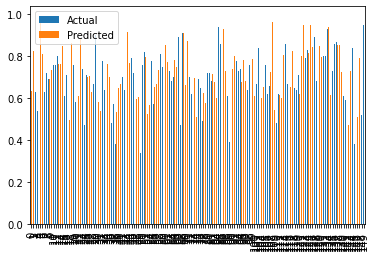

In [ ]:
df.plot(kind='bar')
plot.show()

# Performance Metrics in Linear Regression

In [ ]:
mae,mse,rmse,r2s  = [],[],[],[]
# Displaying errors
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest,yPrediction))
print('Mean Squared Error:',metrics.mean_squared_error(yTest,yPrediction))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
print('R2 Score',metrics.r2_score(yTest,yPrediction))
mae = metrics.mean_absolute_error(yTest,yPrediction)
mse = metrics.mean_squared_error(yTest,yPrediction)
rmse = numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction))
r2s = metrics.r2_score(yTest,yPrediction)

Mean Absolute Error: 0.044412739043273995
Mean Squared Error: 0.004241453980574171
Root Mean Squared Error: 0.06512644609199991
R2 Score 0.768998582846935


# User Input Prediction (Linear Regression)

In [ ]:
print(linearRegressor.predict([[337,118,4,4.5,4.5,3.86,1]]))

[[0.9511295]]


# Training Data (Decision Tree Regression)

In [ ]:
# Creating a Decision Tree Regressor
regressor=DecisionTreeRegressor()
regressor.fit(xTrain,yTrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predicting the test set results
yPrediction=regressor.predict(xTest)

# Performance Metrics in Decision Tree Regression

In [ ]:
# Displaing errors
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest,yPrediction))
print('Mean Squared Error:',metrics.mean_squared_error(yTest,yPrediction))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
print('R2 Score',metrics.r2_score(yTest,yPrediction))
mae = numpy.append(mae, metrics.mean_absolute_error(yTest,yPrediction))
mse = numpy.append(mse,metrics.mean_squared_error(yTest,yPrediction))
rmse = numpy.append(rmse,numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
r2s = numpy.append(r2s,metrics.r2_score(yTest,yPrediction))
print(mae)
print(mse)
print(rmse)
print(r2s)

Mean Absolute Error: 0.06613333333333332
Mean Squared Error: 0.008425333333333332
Root Mean Squared Error: 0.0917896145178382
R2 Score 0.5411328405540101
[0.04441274 0.06613333]
[0.00424145 0.00842533]
[0.06512645 0.09178961]
[0.76899858 0.54113284]


# User Input Prediction (Decision Tree Regression)

In [ ]:
print(regressor.predict([[337,118,4,4.5,4.5,3.86,1]]))

[0.92]


# Training Data (K Neighbors Regression)

In [ ]:
# Training a KNN classifier
knn=KNeighborsRegressor(n_neighbors=7).fit(xTrain,yTrain)

In [ ]:
# Displaying Predictions
yPrediction=knn.predict(xTest)

# Performance Metrics in K Neighbors Regression

In [ ]:
# Displaing errors
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest,yPrediction))
print('Mean Squared Error:',metrics.mean_squared_error(yTest,yPrediction))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
print('R2 Score',metrics.r2_score(yTest,yPrediction))
mae = numpy.append(mae, metrics.mean_absolute_error(yTest,yPrediction))
mse = numpy.append(mse,metrics.mean_squared_error(yTest,yPrediction))
rmse = numpy.append(rmse,numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
r2s = numpy.append(r2s,metrics.r2_score(yTest,yPrediction))
print(mae)
print(mse)
print(rmse)
print(r2s)

Mean Absolute Error: 0.061409523809523824
Mean Squared Error: 0.006579782312925172
Root Mean Squared Error: 0.08111585734568286
R2 Score 0.64164669808851
[0.04441274 0.06613333 0.06140952]
[0.00424145 0.00842533 0.00657978]
[0.06512645 0.09178961 0.08111586]
[0.76899858 0.54113284 0.6416467 ]


# User Input Prediction (K Neighbors Regression)

In [ ]:
print(knn.predict([[337,118,4,4.5,4.5,3.86,1]]))

[[0.93571429]]


# Training Data (Support Vector Regression)

In [ ]:
# Creating a Decision Tree Regressor
regressor=SVR(kernel = 'rbf')
regressor.fit(xTrain,yTrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predicting the test set results
yPrediction=regressor.predict(xTest)

# Performance Metrics in Support Vector Regression

In [ ]:
# Displaing errors
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest,yPrediction))
print('Mean Squared Error:',metrics.mean_squared_error(yTest,yPrediction))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
print('R2 Score',metrics.r2_score(yTest,yPrediction))
mae = numpy.append(mae, metrics.mean_absolute_error(yTest,yPrediction))
mse = numpy.append(mse,metrics.mean_squared_error(yTest,yPrediction))
rmse = numpy.append(rmse,numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
r2s = numpy.append(r2s,metrics.r2_score(yTest,yPrediction))
print(mae)
print(mse)
print(rmse)
print(r2s)

Mean Absolute Error: 0.06423611837799506
Mean Squared Error: 0.006853881693178442
Root Mean Squared Error: 0.08278817363113189
R2 Score 0.6267184811211033
[0.04441274 0.06613333 0.06140952 0.06423612]
[0.00424145 0.00842533 0.00657978 0.00685388]
[0.06512645 0.09178961 0.08111586 0.08278817]
[0.76899858 0.54113284 0.6416467  0.62671848]


# User Input Prediction (Support Vector Regression)

In [ ]:
print(regressor.predict([[337,118,4,4.5,4.5,3.86,1]]))

[0.89061472]


# Training Data (Random Forrest Regression)

In [ ]:
# Creating a Decision Tree Regressor
regressor=RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Predicting the test set results
yPrediction=regressor.predict(xTest)

# Performance Metrics in Random Forrest Regression

In [ ]:
# Displaing errors
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest,yPrediction))
print('Mean Squared Error:',metrics.mean_squared_error(yTest,yPrediction))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
print('R2 Score',metrics.r2_score(yTest,yPrediction))
mae = numpy.append(mae, metrics.mean_absolute_error(yTest,yPrediction))
mse = numpy.append(mse,metrics.mean_squared_error(yTest,yPrediction))
rmse = numpy.append(rmse,numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
r2s = numpy.append(r2s,metrics.r2_score(yTest,yPrediction))
print(mae)
print(mse)
print(rmse)
print(r2s)

Mean Absolute Error: 0.04628999999999999
Mean Squared Error: 0.004592214999999999
Root Mean Squared Error: 0.06776588374691206
R2 Score 0.7498951591293797
[0.04441274 0.06613333 0.06140952 0.06423612 0.04629   ]
[0.00424145 0.00842533 0.00657978 0.00685388 0.00459221]
[0.06512645 0.09178961 0.08111586 0.08278817 0.06776588]
[0.76899858 0.54113284 0.6416467  0.62671848 0.74989516]


# User Input Prediction (Random Forrest Regression)

In [ ]:
print(regressor.predict([[337,118,4,4.5,4.5,3.86,1]]))

[0.9285]


# Training Data (Ridge Regression)

In [ ]:
# Creating a Decision Tree Regressor
regressor=Ridge(alpha=0.01)
regressor.fit(xTrain,yTrain)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Predicting the test set results
yPrediction=regressor.predict(xTest)

# Performance Metrics in Ridge Regression

In [ ]:
# Displaing errors
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest,yPrediction))
print('Mean Squared Error:',metrics.mean_squared_error(yTest,yPrediction))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
print('R2 Score',metrics.r2_score(yTest,yPrediction))
mae = numpy.append(mae, metrics.mean_absolute_error(yTest,yPrediction))
mse = numpy.append(mse,metrics.mean_squared_error(yTest,yPrediction))
rmse = numpy.append(rmse,numpy.sqrt(metrics.mean_squared_error(yTest,yPrediction)))
r2s = numpy.append(r2s,metrics.r2_score(yTest,yPrediction))
print(mae)
print(mse)
print(rmse)
print(r2s)

Mean Absolute Error: 0.044421124650565476
Mean Squared Error: 0.004243155185019546
Root Mean Squared Error: 0.0651395055632106
R2 Score 0.7689059305065941
[0.04441274 0.06613333 0.06140952 0.06423612 0.04629    0.04442112]
[0.00424145 0.00842533 0.00657978 0.00685388 0.00459221 0.00424316]
[0.06512645 0.09178961 0.08111586 0.08278817 0.06776588 0.06513951]
[0.76899858 0.54113284 0.6416467  0.62671848 0.74989516 0.76890593]


# User Input Prediction (Ridge Regression)

In [ ]:
print(regressor.predict([[337,118,4,4.5,4.5,3.86,1]]))

[[0.951105]]


# Plotting Graph to Compare Performaces of Each Model Visually

               Regression Models  ...  R2 Score
0              Linear Regression  ...  0.768999
1       Decision Tree Regression  ...  0.541133
2  K-Nearest Neighbor Regression  ...  0.641647
3      Support Vector Regression  ...  0.626718
4       Random Forest Regression  ...  0.749895
5               Ridge Regression  ...  0.768906

[6 rows x 5 columns]


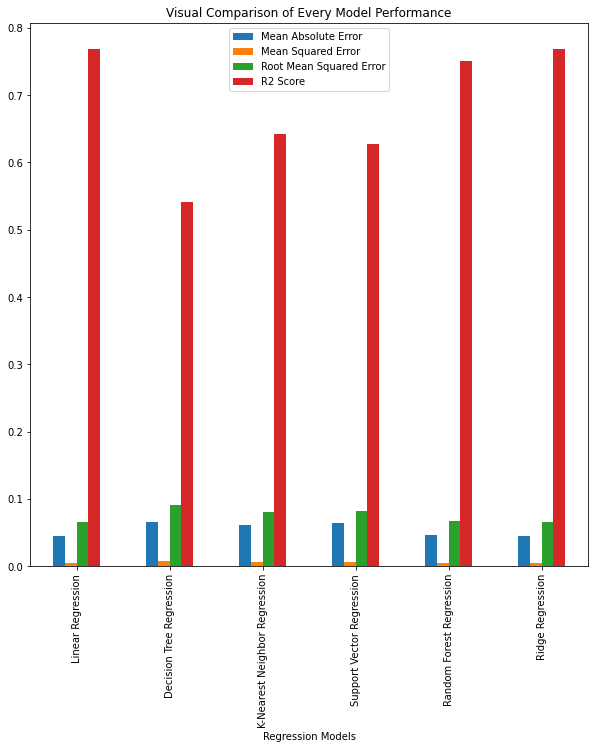

In [ ]:
# create data
df = pandas.DataFrame([['Linear Regression', mae[0], mse[0], rmse[0], r2s[0]], ['Decision Tree Regression', mae[1], mse[1], rmse[1], r2s[1]], ['K-Nearest Neighbor Regression', mae[2], mse[2], rmse[2], r2s[2]],
                   ['Support Vector Regression', mae[3], mse[3], rmse[3], r2s[3]], ['Random Forest Regression', mae[4], mse[4], rmse[4], r2s[4]], ['Ridge Regression', mae[5], mse[5], rmse[5], r2s[5]]],
                  columns=['Regression Models', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Regression Models',
        kind='bar',
        stacked=False, figsize = (10,10),
        title='Visual Comparison of Every Model Performance')